In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([-0.41281042,  0.49175423, -0.43276814,  0.62172213,  0.9758222 ,
       -0.08133758, -0.33072213,  0.68843459,  0.94451208,  0.28915264])

In [3]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.38039293, -0.89244502, -0.70306708, -0.67954526, -0.88443677,
       -0.05595801, -0.81129543,  0.58336742,  0.55736665, -0.44539387])

In [4]:
y = 0.3 * x1 + 0.5 * x2 + 0.1

## Binary Class화 시킴
y = (y > 0).astype('int')

print(y.shape)
y[0:10]

(100,)


array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

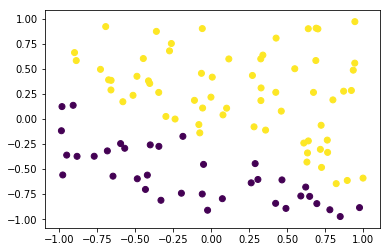

In [5]:
plt.scatter(x1, x2, c=y)

### Define sigmoid

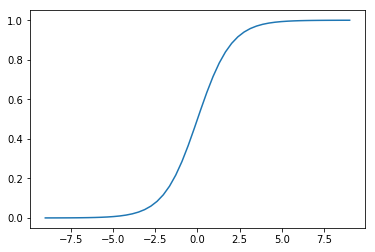

In [6]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start = -9, stop = +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [7]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    predict = (y_predict > 0.5).astype('int')
    accuracy = (predict == y).mean()
    # error = np.abs(y_predict - y).mean()
    
    if epoch % 5 == 0:
        print("{0:2} error = {1:.6f}".format(epoch, accuracy))
    
    if accuracy > 0.95:
        break

    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * (y_predict - y).mean()

print("----" * 10)
# print("w1 = {0:.6f}, w2 = {1:.6f} b = {2:.6f}".format(w1, w2, b))
print("{0:2} error = {1:.6f}".format(epoch, accuracy))

 0 error = 0.450000
 5 error = 0.870000
10 error = 0.940000
15 error = 0.950000
----------------------------------------
16 error = 0.960000


In [8]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b
y_predict = sigmoid(y_predict)
predict = (y_predict > 0.5).astype('int')
result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': predict, 'y(prob)': y_predict})

result

,x1,x2,y(actual),y(predict),y(prob)
0,-0.412810,0.380393,1,1,0.759413
1,0.491754,-0.892445,0,0,0.318957
2,-0.432768,-0.703067,0,0,0.257460
3,0.621722,-0.679545,0,0,0.442433
4,0.975822,-0.884437,0,0,0.405124
5,-0.081338,-0.055958,1,1,0.625081
6,-0.330722,-0.811295,0,0,0.230968
7,0.688435,0.583367,1,1,0.914928
8,0.944512,0.557367,1,1,0.924992
9,0.289153,-0.445394,0,0,0.499188
